In [1]:
import sys, os

# access library by adding project root to sys.path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import numpy as np
import matplotlib.pyplot as plt

from fast_image_align_ot import images, transforms, utils, plots

In [2]:
mnist_images = utils.load_mnist_images('../Data/t10k-images-idx3-ubyte.gz')

f = mnist_images[1]
f = utils.zero_pad_image_stack_to_size(f, 39)

N, ny, nx = f.shape

In [3]:
proj_angles = np.linspace(0, 360, ny, endpoint=False)
p = ny + 1

f_nudft = transforms.Transform(f, n_points=p, angles=proj_angles, apply_ramp=True).polar_nufft()
f_rt = transforms.Transform(f, n_points=p, angles=proj_angles, apply_ramp=True).radon_transform()
f_rt_p, f_rt_n = transforms.hahn_decomposition(f_rt)
f_cdf_p, f_cdf_n = transforms.Transform(f, n_points=p, angles=proj_angles, apply_ramp=True).signed_cdf_transform()
f_icdf_p, f_icdf_n = transforms.Transform(f, n_points=p, angles=proj_angles, apply_ramp=True).signed_inverse_cdf_transform()

	 IMAGE


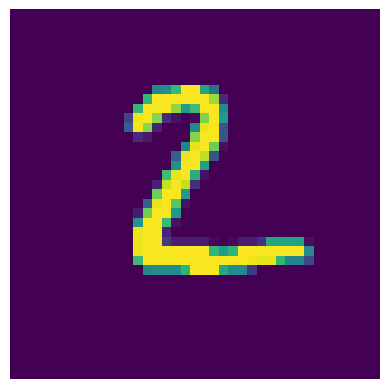

	 NUDFT


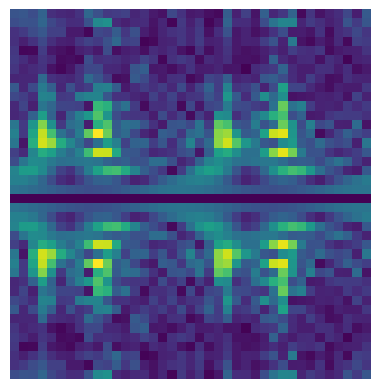

	 RADON TRANSFORM (ramp-filtered)


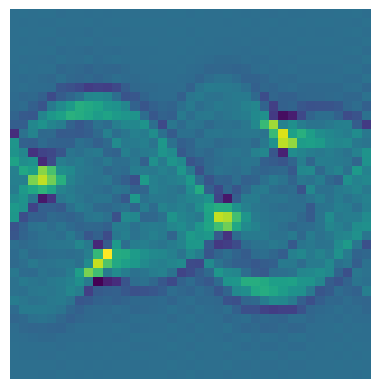

	 RT positive


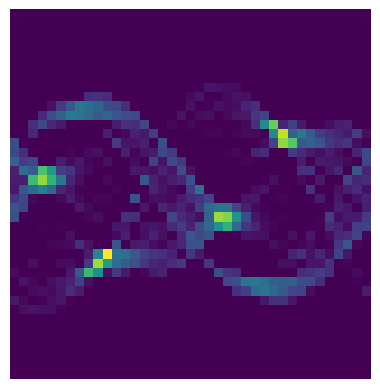

	 RT negative


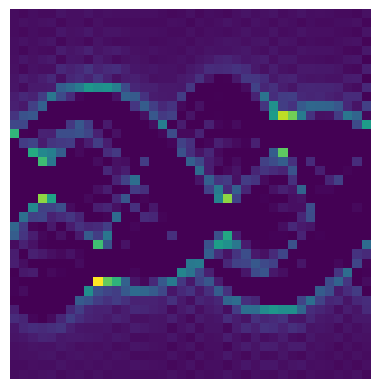

	 CDF POSITIVE


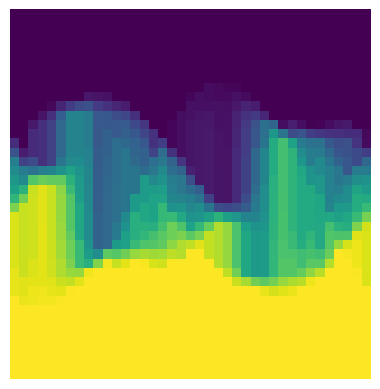

	 CDF NEGATIVE


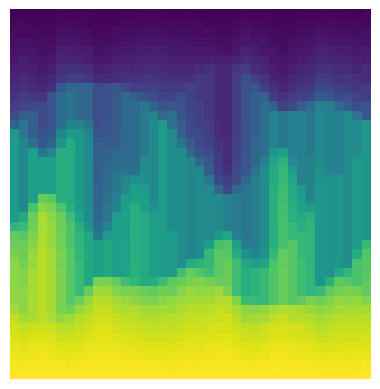

	 ICDF POSITIVE


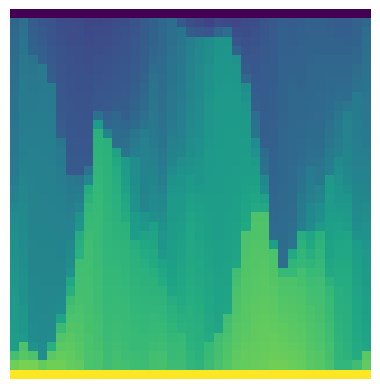

	 ICDF NEGATIVE


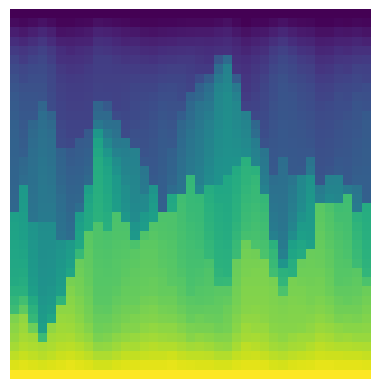

In [4]:
print("\t IMAGE")
plt.imshow(f[0])
plt.axis('off')
plt.show()

print("\t NUDFT")
plt.imshow(abs(f_nudft[0]))
plt.axis('off')
plt.show()

print("\t RADON TRANSFORM (ramp-filtered)")
plt.imshow(f_rt[0])
plt.axis('off')
plt.show()

print("\t RT positive")
plt.imshow(f_rt_p[0])
plt.axis('off')
plt.show()

print("\t RT negative")
plt.imshow(abs(f_rt_n[0]))
plt.axis('off')
plt.show()

print("\t CDF POSITIVE")
plt.imshow(f_cdf_p[0])
plt.axis('off')
plt.show()

print("\t CDF NEGATIVE")
plt.imshow(f_cdf_n[0])
plt.axis('off')
plt.show()

print("\t ICDF POSITIVE")
plt.imshow(f_icdf_p[0])
plt.axis('off')
plt.show()

print("\t ICDF NEGATIVE")
plt.imshow(f_icdf_n[0])
plt.axis('off')
plt.show()